
# Logistic Regression Project - Solutions

In this project, we will be working with a fake 'data of ad' set that shows whether a particular internet user clicks on an Ad on a company's website. We will try to create a model that will predict whether or not to click on an ad based on the features of that user.

This data set includes the following features

* 'daily_time_spent_on_site': consumer time on site in minutes
* 'age': cutomer age in years
* 'area_income': Average Income of geographical area of consumer
* 'daily_internet_usage': Average minutes a day consumer is on the internet
* 'ad_topic_line': Headline of the advertisement
* 'city': City of consumer
* 'male': Whether or not consumer was male
* 'country': Country of consumer
* 'timestamp': Time at which consumer clicked on Ad or closed window
* 'clicked_on_ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries that you think you will need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertisement.csv file and set it to a data frame called data_of_ad.**

In [4]:
data_of_ad = pd.read_csv('advertisement.csv')

**Check the head of data_of_ad**

In [5]:
data_of_ad.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Mandatory 3rdgeneration moderator,Cynthiaside,0,Holy See (Vatican City State),2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Enterprise-wide foreground emulation,Port Juan,1,Seychelles,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Customer-focused incremental system engine,Michellefort,0,Mayotte,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Right-sized multi-tasking solution,Port Angelamouth,1,Uganda,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Vision-oriented optimizing middleware,Jessicahaven,0,Cambodia,2016-06-03 03:36:18,0


**Use info method and describe method on data_of_ad**

In [8]:
data_of_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_income               1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   ad_topic_line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   male                      1000 non-null   int64  
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   clicked_on_ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


In [42]:
data_of_ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram(bins) of the Age**

Text(0.5, 0, 'age')

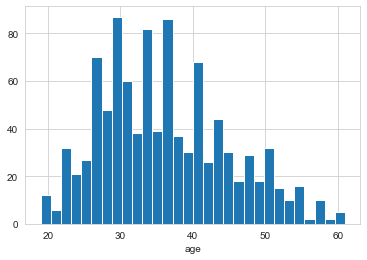

In [9]:
sns.set_style('whitegrid')
data_of_ad['age'].hist(bins=30)
plt.xlabel('age')

**Create a jointplot showing area_income versus Age.**

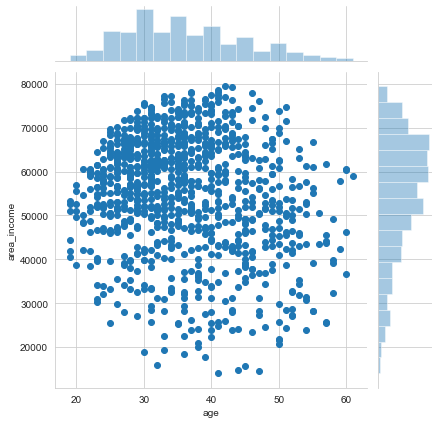

In [24]:
sns.jointplot(x='age',y='area_income',data=data_of_ad)

**Create a jointplot showing the kde distributions of daily_time_spent_on_site vs. Age.**

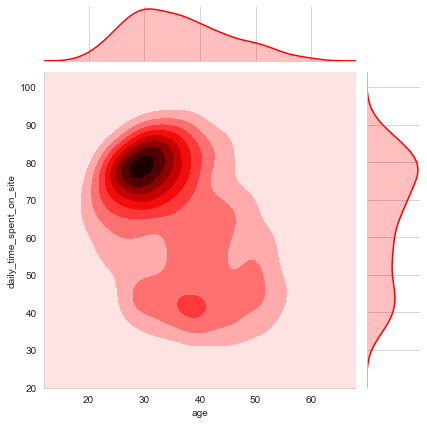

In [11]:
sns.jointplot(x='age',y='daily_time_spent_on_site',data=data_of_ad,color='red',kind='kde');

**Create a jointplot of 'daily_time_spent_on_site' vs. 'daily_internet_usage'**

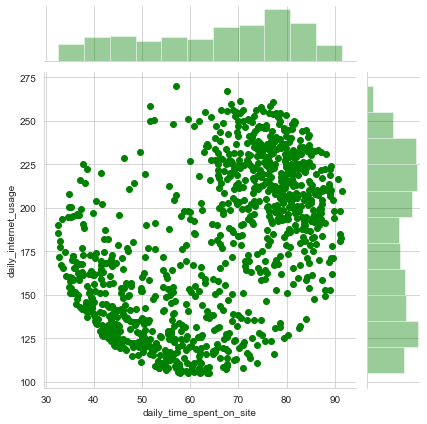

In [13]:
sns.jointplot(x='daily_time_spent_on_site',y='daily_internet_usage',data=data_of_ad,color='green')

**Finally, create a pairplot with the hue defined by the 'clicked_on_ad' column feature.**

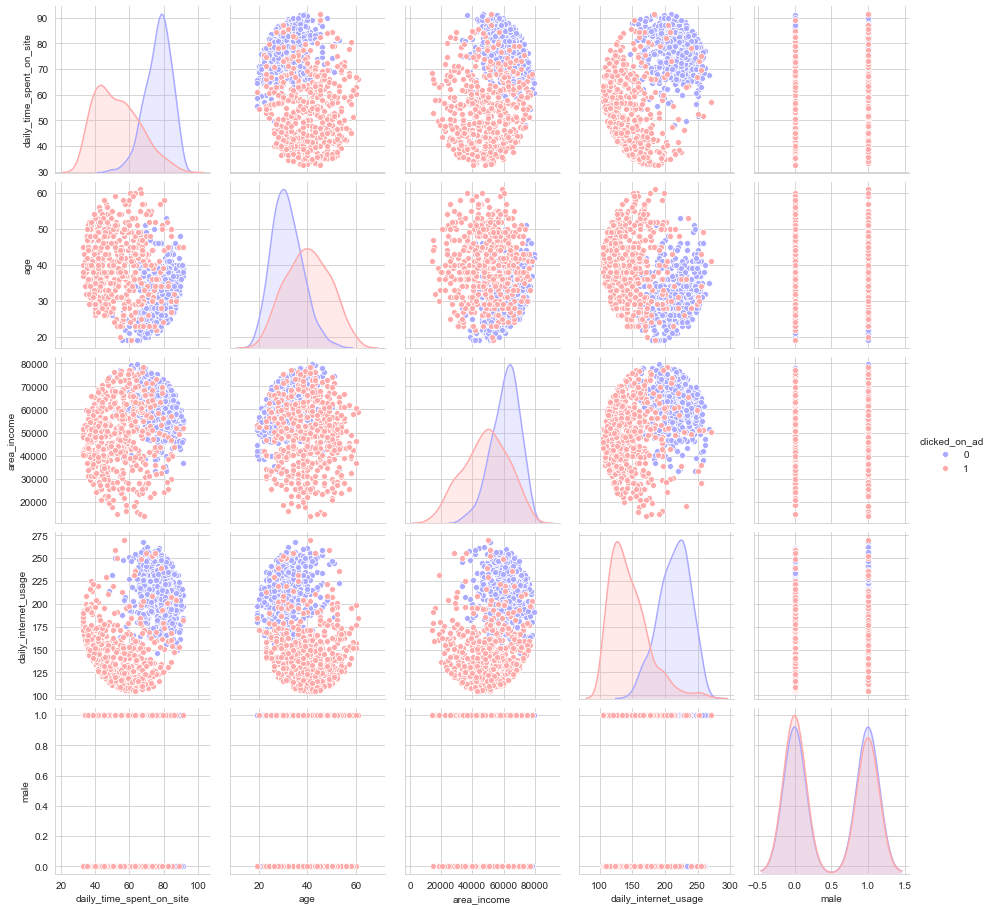

In [14]:
sns.pairplot(data_of_ad,hue='clicked_on_ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data_of_ad[['daily_time_spent_on_site', 'age', 'area_income','daily_internet_usage', 'male']]
y = data_of_ad['clicked_on_ad']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [20]:
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [21]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Great Job!